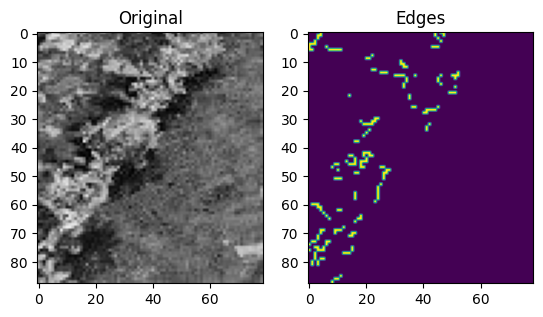

Estimated Crop Field Angle OLS: 44.38702510610566
Estimated Crop Field Angle TLS: 67.97272433513349
Standard Deviation of gradient: 0.21287914150527
Standard Deviation of intercept: 4.802087183954428


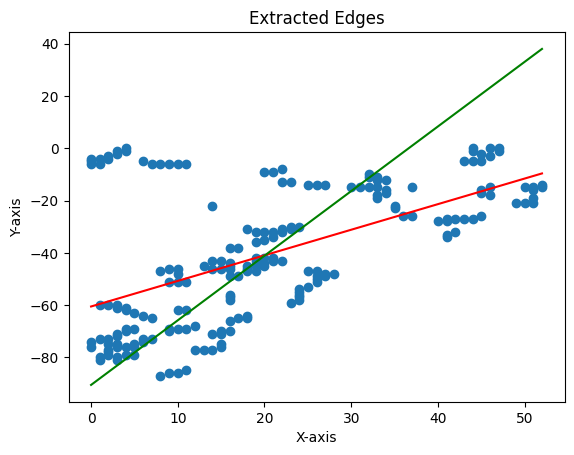

In [2]:
# Assignment 2 - ET3112 Image Processing and Machine Vision
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.odr as odr


im = cv.imread ('images/crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

edges = cv.Canny(im, 550, 690)

indices = np.where(edges != [0])
x = indices[1]
y = -indices[0]


# Question 1
fig, ax = plt.subplots(1,2)
ax[0].imshow(im)
ax[0].set_title('Original')
ax[1].imshow(edges)
ax[1].set_title('Edges')
plt.show()

# Question 3 - Least-Squares using polyfit
m, c = np.polyfit(x, y, 1)  
x_line = np.array([min(x), max(x)])
y_line = m * x_line + c

# Question 5 
# No, as the gradient doesn't seem to take into consideration the scale between the y axis and x axis


# Question 6 - Total Least Squares
def linear_model(params, x):
    m2, c2 = params
    y = m2 * x + c2
    return y
linear_odr = odr.Model(linear_model)
data = odr.RealData(x, y)
guess = [m, c]
odr_obj = odr.ODR(data, linear_odr, beta0=guess)

output = odr_obj.run()

m2 = output.beta[0]  
c2 = output.beta[1]   
sd_m = output.sd_beta[0]  
sd_c = output.sd_beta[1]  

x_line2 = np.array([min(x), max(x)])
y_line2 = m2 * x_line2 + c2


# Question 4 - Calculating Angle
angle = np.arctan(m) 
deg = np.rad2deg(angle) 
print("Estimated Crop Field Angle OLS:", deg)

# Question 7 - Angles
angle = np.arctan(m2) 
deg = np.rad2deg(angle) 
print("Estimated Crop Field Angle TLS:", deg)
print("Standard Deviation of gradient:", sd_m)
print("Standard Deviation of intercept:", sd_c)

# Question 8 
# I believe this angle is more correct than the one calculated with OLS


# Question 2 - Plotting Edges
plt.scatter(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Extracted Edges")
#Q3
plt.plot(x_line, y_line, color='red', label='Least Squares Line')
#Q6
plt.plot(x_line2, y_line2, color='green', label='Total Least Squares Line')
plt.show()